In [ ]:
# Analyse différentille hhv8 :
# install :
%pip install pandas
%pip install matplotlib seaborn
%pip install scikit-learn
%pip install scipy
%pip install seaborn

In [ ]:
import os
import pandas as pd

# count_featurecounts
count_dir = "./count_featurecounts"
output_matrix = "./count_featurecounts/gene_count_matrix_featurecounts.csv"


files = [f for f in os.listdir(count_dir) if f.endswith("_counts.txt")]
dfs = []

for file in files:
    sample_name = file.replace("_not_hg38_counts.txt", "")
    path = os.path.join(count_dir, file)
    
    df = pd.read_csv(path, sep='\t', skiprows=1)
    
    df = df[['Geneid', df.columns[-1]]] 
    df.columns = ['Geneid', sample_name]
    dfs.append(df.set_index('Geneid'))


combined_df = pd.concat(dfs, axis=1)

# remove les gènes "unassigned"
combined_df = combined_df[~combined_df.index.str.contains("unassigned", na=True)]

combined_df.to_csv(output_matrix)
print(f"Matrice donnnnnneeeeeee: {output_matrix}")

Matrice : ./count_featurecounts/gene_count_matrix_featurecounts.csv


total de reads par ech :
KAP_57_S3          163
KAP_66_S7            1
KAP_67_2_S8          0
KAP_40_S3          423
KAP_53_S11           0
KAP_43_S5         2002
KAP_44_S6            0
KAP_71_S11           0
KAP_64_S6         8364
KAPKEY13_S10         2
KAPKEY18_S13        18
KAP36_S2          1764
KAP_45_S7        59696
KAP_67_S5            0
KAP_48_S9         1251
KAP_41_S2            0
KAP_73_S6          185
KAP_42_1_S4          0
KAP_53_S3            0
KAP_56_S12        1223
KAP_37_S2         9754
KAP_74_S3         2160
KAP51_S5         56241
KAP38_S3         27608
KAP_63_S5        79018
KAP_52_S10           0
KAP_59_S4           21
KAP_70_S10        2050
KAP_46_S8         4521
KAP_37_S1         3229
KAP_65_2_S2          0
KAP_62_2_S1     164387
KAP_72_S12           0
KAP32_S1        142191
KAPKEY21_S14         6
KAPKEY10_S9         11
KAP_78_S7          102
KAPKEY22_S15        11
KAP_60_S4            0
KAPKEY14_S11         8
KAPKEY16_S12        19
KAP_33_S1        17243
KAP_68_S9

/tmp/ipykernel_1119669/3845626744.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_reads.index, y=total_reads.values, palette="viridis")



Barplot du nombre total de reads par échantillon :


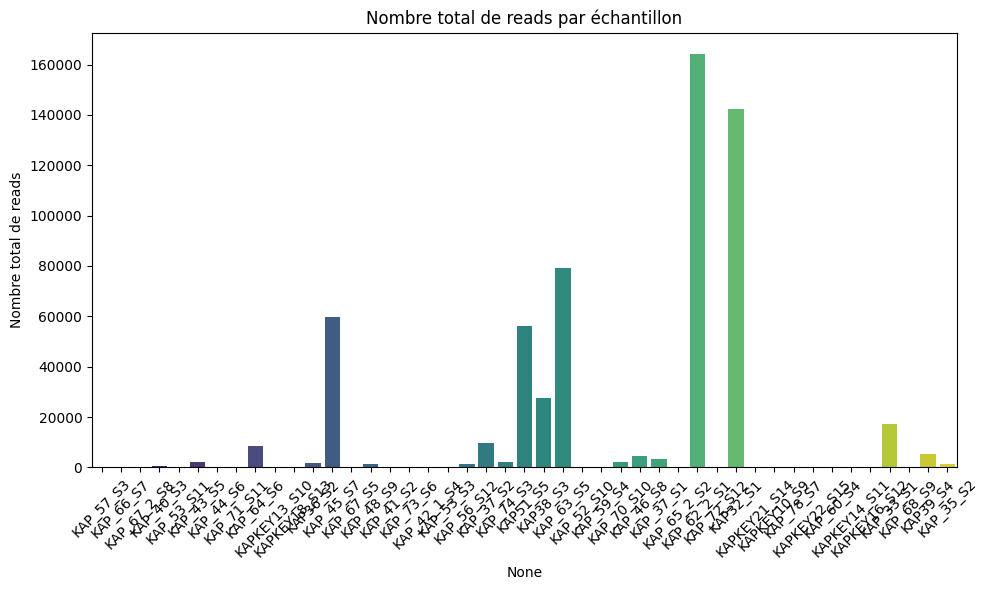

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("./count_featurecounts/gene_count_matrix_featurecounts.csv", index_col="Geneid")


total_reads = df.sum()
print("total de reads par ech :")
print(total_reads)

# plot:
# Plot barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=total_reads.index, y=total_reads.values, palette="viridis")
print("\nBarplot du nombre total de reads par échantillon :")
plt.xticks(rotation=45)
plt.ylabel("Nombre total de reads")
plt.title("Nombre total de reads par échantillon")
plt.tight_layout()
plt.show()


Gènes les plus exprimés :
Geneid
HHV8GK18_gp79    11989.822222
HHV8_gs01          905.866667
HHV8GK18_gp64       32.444444
HHV8GK18_gp65       23.511111
HHV8_gs02           23.444444
HHV8GK18_gp63       20.911111
HHV8_gs06           19.955556
HHV8_gs03           19.111111
HHV8_gs09           15.511111
HHV8_gs04           13.511111
dtype: float64

Heatmap des gènes les plus exprimés (top 20):


<Figure size 1000x800 with 0 Axes>

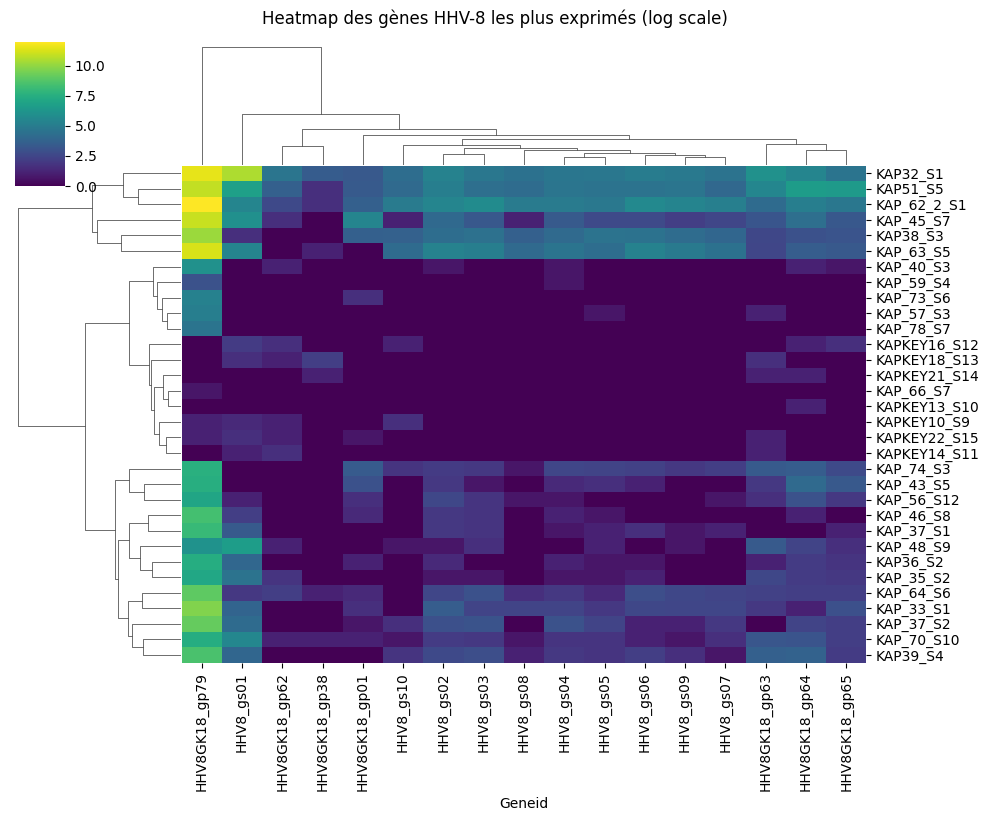


1 gènes sans expression :
['HHV8GK18_gp39']


In [ ]:
# Moyenne d'expression par gène
mean_expression = df.mean(axis=1).sort_values(ascending=False)
print("\nGènes les plus exprimés :")
print(mean_expression.head(10))

# plot :

df_filtered = df.loc[:, df.sum() > 0]  
df_gene_sorted = df_filtered.T 

top_genes = mean_expression[mean_expression > 0].head(20).index.tolist()
df_top_genes = df_gene_sorted[top_genes]

#heatmap
df_log = df_top_genes.apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10, 8))
sns.clustermap(df_log, cmap="viridis", yticklabels=True, xticklabels=True, annot=False, figsize=(10, 8))
print("\nHeatmap des gènes les plus exprimés (top 20):")
plt.suptitle("Heatmap des gènes HHV-8 les plus exprimés (log scale)", y=1.02)
plt.show()

zero_genes = df[df.sum(axis=1) == 0].index.tolist()
print(f"\n{len(zero_genes)} gènes sans expression :")
print(zero_genes[:10])

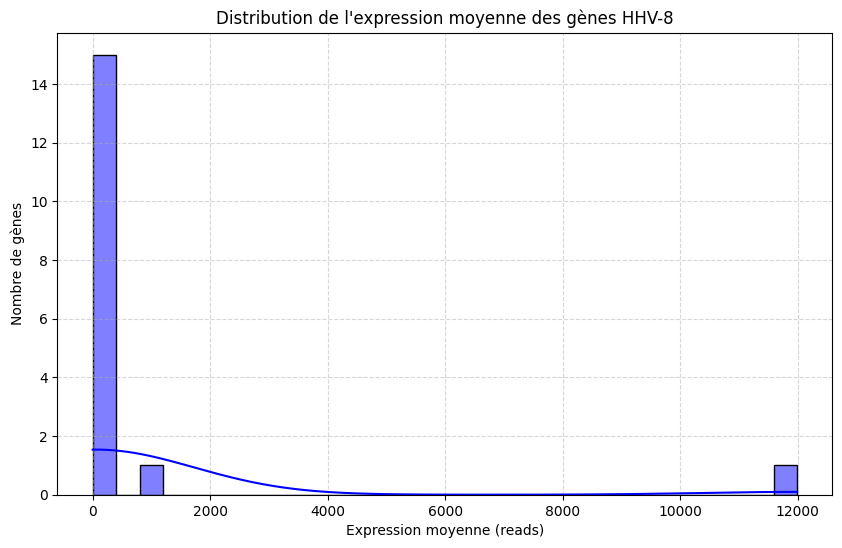

In [ ]:
#Histogramme de l'expression moyenne des gènes
# Expression moyenne par gène
mean_expression = df.mean(axis=1).sort_values(ascending=False)

mean_expression = mean_expression[mean_expression > 0]

# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(mean_expression, bins=30, kde=True, color='blue')
plt.xlabel("Expression moyenne (reads)")
plt.ylabel("Nombre de gènes")
plt.title("Distribution de l'expression moyenne des gènes HHV-8")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

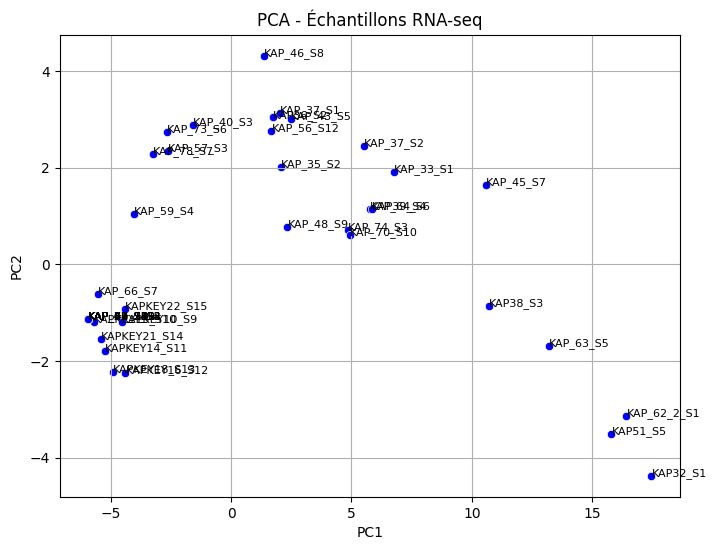

In [6]:
from sklearn.decomposition import PCA

# Log transform
log_df = df.apply(lambda x: np.log(x + 1))

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_df.T)

# Plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1],  color='blue')
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]),  fontsize=8)
plt.title("PCA - Échantillons RNA-seq")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [ ]:
# Analyse différentielle :
# Volcano plot si DESeq2 ou edgeR via R
library(DESeq2)

In [ ]:

countData <- read.csv("./count_featurecounts/gene_count_matrix_featurecounts.csv", row.names = "Geneid")


zero_genes <- apply(countData, 1, function(x) all(x == 0))
countData <- countData[!zero_genes, ] 


if(nrow(countData) == 0) {
    stop("Tous les gènes sont à zéro. Pas de données valides pour DESeq2")
}

metadata <- data.frame(
    sample = colnames(countData),
    group = c(rep("GroupA", 2), rep("GroupB", ncol(countData) - 2)),
    row.names = "sample"
)

#dataset DESeq2
dds <- DESeqDataSetFromMatrix(countData = countData,
                              colData = metadata,
                              design = ~ group)

# 
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep, ]

# DESeq2
dds <- DESeq(dds)

res <- results(dds)
write.csv(as.data.frame(res), "./DESeq2_results.csv")

In [ ]:
# Après le script R  > volcano plot en Python :


import matplotlib.pyplot as plt

# DESeq2 depuis R
results = pd.read_csv("DESeq2_results.csv")

# Nettoyage
results = results[(results["padj"].notna()) & (results["log2FoldChange"].notna())]

results['significant'] = 'No'
results.loc[(results['padj'] < 0.05) & (results['log2FoldChange'] > 1), 'significant'] = 'Up'
results.loc[(results['padj'] < 0.05) & (results['log2FoldChange'] < -1), 'significant'] = 'Down'

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=results, x='log2FoldChange', y=-np.log10(results['padj']),
                hue='significant', palette={'Up': 'red', 'Down': 'blue', 'No': 'gray'},
                alpha=0.7, s=20)
plt.axhline(-np.log10(0.05), color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')
plt.axvline(-1, color='black', linestyle='--')
plt.title("Volcano Plot : log2FC vs -log10(padj)")
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(padj)")
plt.legend()
plt.show()